# Developing a data driven model to predict Tc
The objective of this project is to develop a data driven model to predict Tc as a function of substrate chemistry, NbN layer characteristics, and process conditions

## Preprocessing

### Step 1: Import the libraries

We need to import 4 essential python libraries:
1. pandas for handling the data
2. numpy for numerical and mathematical applications
3. matplotlib for visualization
4. seaborn for visualization

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [40]:
pwd = os.getcwd()
print(pwd)

e:\research\NbN_MS_project\review_from_sb\plots\data_analysis


### Step 2: Import the data-set

In [19]:
df = pd.read_excel('data/NbN_feature_added.xlsx')
df.head()

,method,substrate,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,DcMs,Al2O3,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,DcMs,Al2O3,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,DcMs,Al2O3,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,DcMs,Al2O3,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          94 non-null     object 
 1   substrate       94 non-null     object 
 2   temperature     94 non-null     float64
 3   pressure        94 non-null     float64
 4   thickness       94 non-null     float64
 5   specific_heat   94 non-null     float64
 6   e_conductivity  94 non-null     float64
 7   atomic_radius   94 non-null     float64
 8   ionic_radius    94 non-null     float64
 9   ρ               94 non-null     float64
 10  Eg              94 non-null     float64
 11  Eip1            94 non-null     float64
 12  Eip2            94 non-null     float64
 13  Tc_K            94 non-null     float64
dtypes: float64(12), object(2)
memory usage: 10.4+ KB


In [21]:
df.describe()

,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
count,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000,94.000000
mean,472.095315,4.821898,79.579468,0.851177,1.196757e-01,1.041450,0.911468,3.722979,5.647447,967.390851,2362.25805,12.587423
std,278.420445,10.789924,110.421974,0.197577,7.780949e-02,0.167841,0.210447,0.999756,2.771026,118.292311,465.04829,2.146988
min,25.000000,0.000020,3.200000,0.350000,2.500000e-12,0.098000,0.540000,2.330000,1.120000,762.900000,1577.10000,7.660000
25%,350.000000,0.333306,5.000000,0.710000,3.450000e-02,0.962000,0.710000,3.580000,1.990000,844.575000,1970.62500,11.000000
50%,600.000000,0.800000,10.000000,0.912000,1.508000e-01,1.070000,1.026000,3.580000,7.000000,1018.800000,2419.35000,12.995000
75%,750.000000,6.666118,174.775000,0.970000,1.885077e-01,1.145000,1.060000,3.950000,7.770000,1025.350000,2759.48000,14.275000
max,850.000000,66.700000,500.000000,1.324000,2.260000e-01,1.235000,1.123333,9.680000,10.800000,1366.566667,3768.40000,16.100000


### Dealing with missing values
#### Counting null values if there is any

In [22]:
def percentageOfnull(df):
    nan_count = df.isna().sum().sort_values(ascending=False)
    nan_percentage = ((df.isna().sum()/df.isna().count())*100).sort_values(ascending=False)
    train_test_dtype = df.dtypes
    df_info = pd.concat([nan_count,nan_percentage,train_test_dtype],axis=1,keys=['Null Count','Null Percentage','DataTypes'])
    return df_info[df_info['Null Count']>0]


percentageOfnull(df)

,Null Count,Null Percentage,DataTypes


We can see, there is no null value in the dataset

#### Filling missing values

In [23]:
numerical_feats = list(df.drop('Tc_K',axis=1).select_dtypes(include='number'))
categorical_feats = list(df.select_dtypes(exclude='number'))
print(numerical_feats, end="\n\n")
print(categorical_feats, end="\n\n")

['temperature', 'pressure', 'thickness', 'specific_heat', 'e_conductivity', 'atomic_radius', 'ionic_radius', 'ρ', 'Eg', 'Eip1', 'Eip2']

['method', 'substrate']



In [24]:
df[numerical_feats].head()

,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2
0,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48
1,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48
2,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48
3,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48
4,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48


In [25]:
df2 = df.iloc[:, 2:]
df2.head()

,temperature,pressure,thickness,specific_heat,e_conductivity,atomic_radius,ionic_radius,ρ,Eg,Eip1,Eip2,Tc_K
0,600.0,6.756078,4.3,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.00
1,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.30
2,600.0,6.756078,4.4,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,11.10
3,600.0,6.756078,10.0,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,14.30
4,750.0,0.500000,3.2,0.912,0.1508,0.962,1.026,3.95,7.0,1018.8,2759.48,9.87


In [26]:
plt.style.use('default')

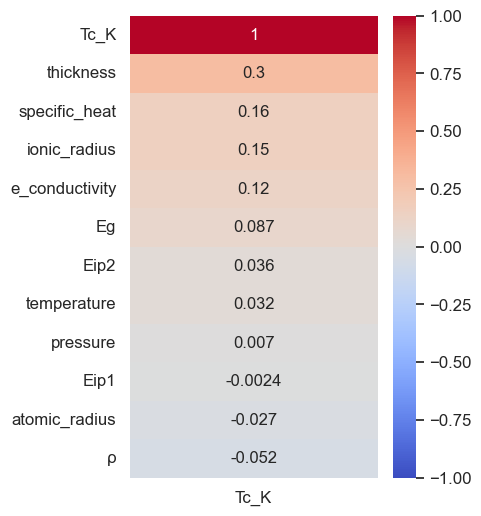

In [49]:
corr_new_train = df2.corr()
plt.style.use('default')
plt.figure(figsize=(4,6))
sns.set(font_scale=1.1)
sns.heatmap(corr_new_train[['Tc_K']].sort_values(by=['Tc_K'],
    ascending=False).head(30),annot_kws={"size": 12},vmin=-1, cmap='coolwarm', annot=True)
#plt.savefig(pwd+'/figures/correlation_plot.png', dpi=1000, bbox_inches="tight")
plt.show()

In [28]:
#print categories of each categorical column

for col in df.select_dtypes(exclude=['number']):
  print(f'{col:-<30}, {df[col].unique()}')

method------------------------, ['DcMs' 'IBAD' 'RfMs' 'PLD']
substrate---------------------, ['Al2O3' 'GaAs' 'LiNbO3' 'MgF2' 'MgO' 'Si' 'SiN' 'HfO2']


In [29]:
num_feats = [item for item in numerical_feats]
num_feats

['temperature',
 'pressure',
 'thickness',
 'specific_heat',
 'e_conductivity',
 'atomic_radius',
 'ionic_radius',
 'ρ',
 'Eg',
 'Eip1',
 'Eip2']

In [30]:
method_list = [df['method'].unique()]
substrate_list = [df['substrate'].unique()]

print(method_list)
print(substrate_list)

[array(['DcMs', 'IBAD', 'RfMs', 'PLD'], dtype=object)]
[array(['Al2O3', 'GaAs', 'LiNbO3', 'MgF2', 'MgO', 'Si', 'SiN', 'HfO2'],
      dtype=object)]


In [31]:
df3 = df2.iloc[:,:3]
df3 = df3.join(df['Tc_K'])
df3

,temperature,pressure,thickness,Tc_K
0,600.0,6.756078,4.3,11.00
1,600.0,6.756078,4.4,11.30
2,600.0,6.756078,4.4,11.10
3,600.0,6.756078,10.0,14.30
4,750.0,0.500000,3.2,9.87
...,...,...,...,...
89,400.0,0.333306,4.5,9.30
90,400.0,0.333306,5.6,10.40
91,400.0,0.333306,10.0,12.50
92,400.0,0.333306,140.0,14.60


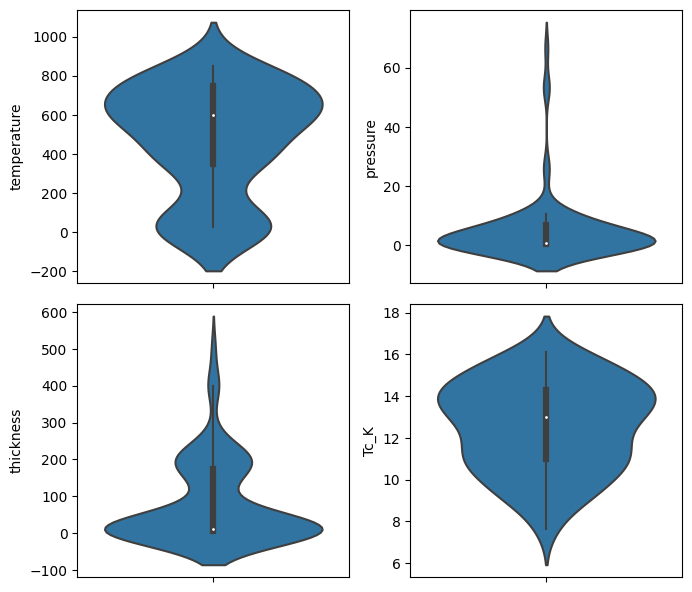

In [41]:
plt.style.use('default')
# Create a figure with 3 rows and 4 columns
fig, axs = plt.subplots(2, 2, figsize=(7, 6))

# Use a loop to plot a violin plot in each subplot
for i in range(2):
    for j in range(2):
        # Select the column to plot in the current subplot
        column = df3.columns[i * 2 + j]
        sns.violinplot(y=column, data=df3, ax=axs[i, j], hue = df.method)

fig.tight_layout(pad=1.0)
#plt.savefig(pwd+'/figures/violin_plot_1.png', dpi=1000, bbox_inches="tight")
plt.show()

In [33]:
df4 = df2.iloc[:, 3:-1]
df4 = df4.drop(columns=['atomic_radius', 'ionic_radius'], axis=1)
df4

,specific_heat,e_conductivity,ρ,Eg,Eip1,Eip2
0,0.912,0.1508,3.95,7.00,1018.800000,2759.480000
1,0.912,0.1508,3.95,7.00,1018.800000,2759.480000
2,0.912,0.1508,3.95,7.00,1018.800000,2759.480000
3,0.912,0.1508,3.95,7.00,1018.800000,2759.480000
4,0.912,0.1508,3.95,7.00,1018.800000,2759.480000
...,...,...,...,...,...,...
89,0.350,0.0345,5.32,1.42,762.900000,1888.650000
90,0.350,0.0345,5.32,1.42,762.900000,1888.650000
91,0.350,0.0345,5.32,1.42,762.900000,1888.650000
92,0.350,0.0345,5.32,1.42,762.900000,1888.650000


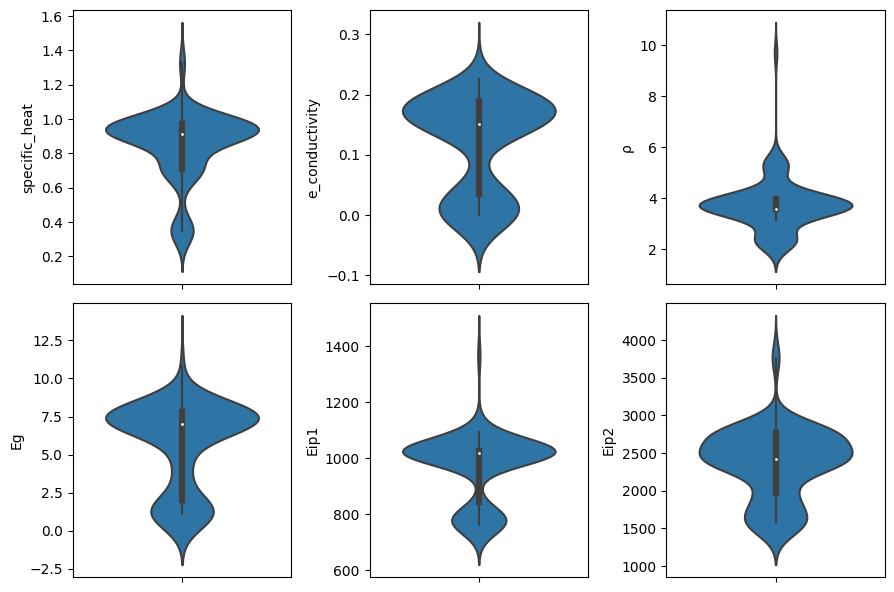

In [42]:
plt.style.use('default')
# Create a figure with 3 rows and 4 columns
fig, axs = plt.subplots(2, 3, figsize=(9, 6))

# Use a loop to plot a violin plot in each subplot
for i in range(2):
    for j in range(3):
        # Select the column to plot in the current subplot
        column = df4.columns[i * 3 + j]
        sns.violinplot(y=column, data=df4, ax=axs[i, j], width=0.7, cut=3, saturation=0.8)
fig.tight_layout(pad=1.0)
#plt.savefig(pwd+'/figures/violin_plot_2.png', dpi=1000, bbox_inches="tight")
plt.show()